In [1]:
import fastai.vision as vision
import fastai
from pathlib import Path

In [2]:
if __name__ == '__main__':
    path = "C:\\google_drive\\software_dev\\the_shape_sifter\\mtMind\\categories\\"

    # tfms = vision.get_transforms(do_flip=True, xtra_tfms=[resize_method=ResizeMethod.SQUISH])

    data = vision.ImageDataBunch.from_folder(path, bs=32, size=240, resize_method=3)
    ds = data.train_ds

In [3]:
    learn = vision.cnn_learner(data, vision.models.resnet50, metrics=vision.error_rate)
    learn.load("C:\\google_drive\\software_dev\\the_shape_sifter\\mtMind\\categories\\models\\model_rs50_v3")

Learner(data=ImageDataBunch;

Train: LabelList (420 items)
x: ImageList
Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240)
y: CategoryList
brick,brick,brick,brick,brick
Path: C:\google_drive\software_dev\the_shape_sifter\mtMind\categories;

Valid: LabelList (109 items)
x: ImageList
Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240),Image (3, 240, 240)
y: CategoryList
brick,brick,brick,brick,brick
Path: C:\google_drive\software_dev\the_shape_sifter\mtMind\categories;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=Fal

In [ ]:
learn.lr_find(stop_div=False, num_it=200)

In [ ]:
learn.recorder.plot()

In [4]:
    learn.fit_one_cycle(4)

    learn.save("C:\\google_drive\\software_dev\\the_shape_sifter\\mtMind\\categories\\models\\model_rs50_v4")



epoch,train_loss,valid_loss,error_rate,time
0,0.007764,0.870386,0.192661,01:42
1,0.012574,0.805918,0.155963,01:20
2,0.011685,0.781964,0.174312,01:18
3,0.012840,0.777894,0.165138,01:18


In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)

interp = vision.learner.ClassificationInterpretation(learn, preds, y, losses)

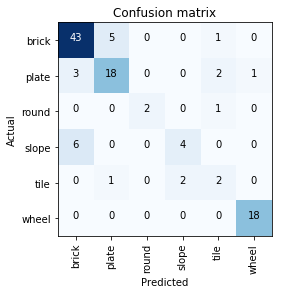

In [8]:
interp.plot_confusion_matrix()

In [6]:
learn.predict(img)

(Category plates, tensor(1), tensor([0.0916, 0.9084]))

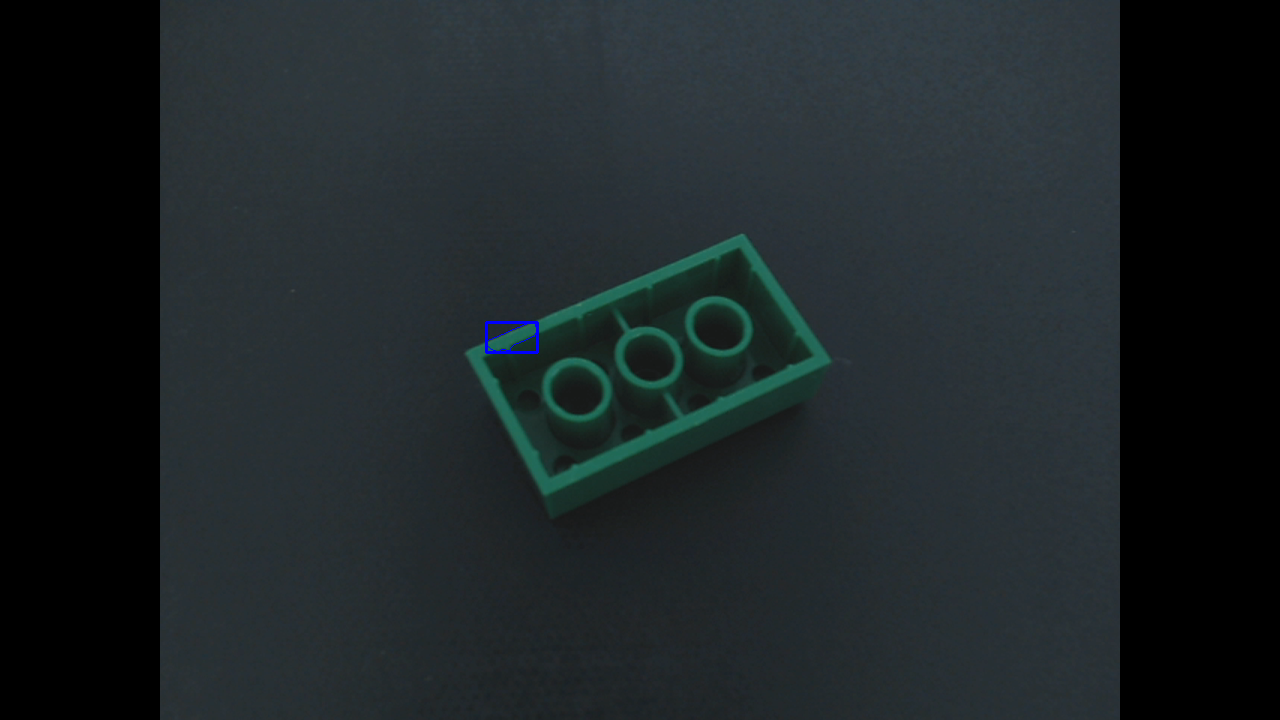

In [7]:
img

In [8]:
img2 = vision.open_image("C:\google_drive\software_dev\\the_shape_sifter\shape_sifter_server\images\image_60.21875.png")

In [9]:
learn.predict(img2)

(Category plates, tensor(1), tensor([0.4655, 0.5345]))

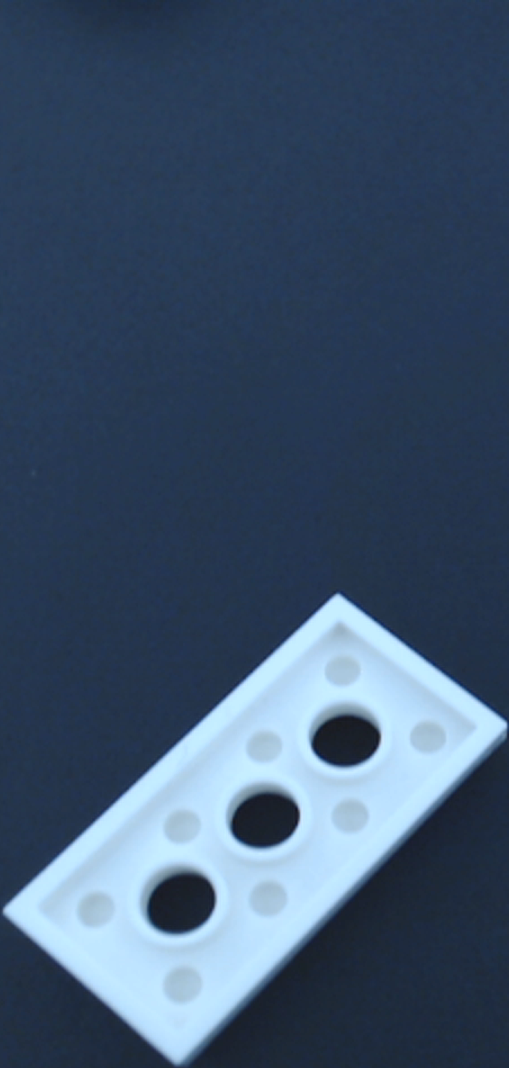

In [10]:
img2